In [ ]:
pip install snap-stanford

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 11.6 MB/s 


In [ ]:
status = False
try:
    import snap
    version = snap.Version
    i = snap.TInt(5)
    if i == 5:
        status = True
except:
    pass

if status:
    print("SUCCESS, your version of Snap.py is %s" % (version))
else:
    print("*** ERROR, no working Snap.py was found on your computer")

SUCCESS, your version of Snap.py is 6.0.0


In [ ]:
# Importing the libraries we're going to use in the Project2-2
import snap
import time
import pandas as pd

In [ ]:
# Graph constructor
def CreateGraph(nodes):
  Rnd = snap.TRnd(1,0)
  graph = snap.GenSmallWorld(nodes, 5, 0.3, Rnd)
  return graph

In [ ]:
# Creating a 50-node graph with out-degree of 5
graph1 = CreateGraph(50)

# Getting the node ID having the maximum degree
nId = graph1.GetMxDegNId()

# Getting the nodes and their degrees from the graph
deg = graph1.GetDegSeqV()

# Printing out the node with the highest degree
print('Node %d has a highest degree of %d' % (nId, deg[nId]))

# Getting the Hub and Authority scores for each node of the graph
NIdHubH, NIdAuthH = graph1.GetHits()

# Sorting by values the Hub and Authority scores
NIdHubH.Sort(False, False)
NIdAuthH.Sort(False, False)

# Getting the values of Hub and Authority scores
hubs = NIdHubH.values()
auth = NIdAuthH.values()

# Printing out the node with the max Hub score and its score
for item in NIdHubH:
  if NIdHubH[item] == max(hubs):
    print('Node %d has the max Hub score of %.3f' % (item, NIdHubH[item]))

# Printing out the node with the max Authority score and its score
for item in NIdAuthH:
  if NIdAuthH[item] == max(auth):
    print('Node %d has the max Authority score of %.3f' % (item, NIdAuthH[item]))

Node 44 has a highest degree of 13
Node 8 has the max Hub score of 0.186
Node 8 has the max Authority score of 0.186


In [ ]:
'''
Estimating the time needed for the execution of the Girvan-Newman community
detection algorithm based on betweenness centrality
'''
st = time.time()
modularity, CmtyV = graph1.CommunityGirvanNewman()
elapsed_time = time.time() - st
print('Execution time: %.5f' % elapsed_time)

Execution time: 0.16329


In [ ]:
'''
Estimating the time needed for the execution of the Clauset-Newman-Moore
community detection method
'''
st = time.time()
modularity, CmtyV = graph1.CommunityCNM()
elapsed_time = time.time() - st
print('Execution time: %.5f' % elapsed_time)

Execution time: 0.00096


In [ ]:
nodes = []
time1 = []
time2 = []

# Applying the Girvan-Newman algorithm
def GN_Algo(graph):
  st1 = time.time()
  modularity, CmtyV = graph.CommunityGirvanNewman()
  elapsed_time1 = time.time() - st1
  time1.append(elapsed_time1)
  print('Execution time GN algorithm: %.5f' % elapsed_time1)

# Applying the Clauset-Newman-Moore algorithm
def GNM_Algo(graph):
  st2 = time.time()
  modularity, CmtyV = graph.CommunityCNM()
  elapsed_time2 = time.time() - st2
  time2.append(elapsed_time2)
  print('Execution time GNM algorithm: %.5f' % elapsed_time2)

In [ ]:
# Creating a dictionary with the graphs we're creating
graph_dict = {}
keys = graph_dict.keys()

# Creating the graphs to study
for n in range(50,1050,50):
  nodes.append(n)
  graph = CreateGraph(n)
  graph_dict[n] = graph


In [ ]:
#Estimating Girvan-Newman algorithm for our graphs
for key in keys:
  GN_Algo(graph_dict[key])

Execution time GN algorithm: 0.17082
Execution time GN algorithm: 1.28572
Execution time GN algorithm: 4.09954
Execution time GN algorithm: 8.01429
Execution time GN algorithm: 16.72416
Execution time GN algorithm: 31.99741
Execution time GN algorithm: 49.27732
Execution time GN algorithm: 65.04922
Execution time GN algorithm: 96.81224
Execution time GN algorithm: 136.57341
Execution time GN algorithm: 178.68814
Execution time GN algorithm: 238.64273
Execution time GN algorithm: 287.10677
Execution time GN algorithm: 362.17274
Execution time GN algorithm: 488.97587
Execution time GN algorithm: 516.00390
Execution time GN algorithm: 609.02227
Execution time GN algorithm: 741.81170
Execution time GN algorithm: 896.34037
Execution time GN algorithm: 1050.25987


In [ ]:
#Estimating Clauset-Newman-Moore algorithm for our graphs
for key in keys:
  GNM_Algo(graph_dict[key])

Execution time GNM algorithm: 0.00077
Execution time GNM algorithm: 0.00195
Execution time GNM algorithm: 0.00303
Execution time GNM algorithm: 0.00646
Execution time GNM algorithm: 0.00614
Execution time GNM algorithm: 0.00860
Execution time GNM algorithm: 0.01017
Execution time GNM algorithm: 0.01259
Execution time GNM algorithm: 0.01683
Execution time GNM algorithm: 0.02098
Execution time GNM algorithm: 0.02483
Execution time GNM algorithm: 0.02810
Execution time GNM algorithm: 0.04192
Execution time GNM algorithm: 0.04714
Execution time GNM algorithm: 0.04931
Execution time GNM algorithm: 0.05128
Execution time GNM algorithm: 0.05971
Execution time GNM algorithm: 0.06356
Execution time GNM algorithm: 0.07575
Execution time GNM algorithm: 0.09478


In [ ]:
# Creating a dataframe for the execution time of the algoritms
df = pd.DataFrame({'GN Time' : time1, 'GNM Time' : time2}, index = nodes)

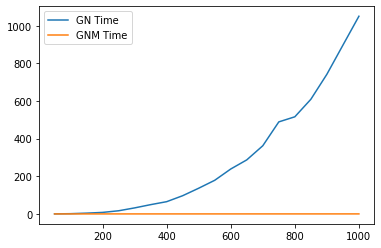

In [ ]:
lines = df.plot.line()

We can conclude from the above diagram that the execution time of the `Clauset-Newman-Moore's algorithm fits better in all cases`.

In [ ]:
# Estimating the Pagerank of the nodes using the biggest graph
PRankH = graph_dict[1000].GetPageRank()

# Sorting the values of the PageRank in descending order
PRankH.Sort(False, False)

# Getting the top-30 nodes with the highest PageRank
prkeys = PRankH.keys()[:30]
prval = PRankH.values()[:30]

# Printing out the top-30 nodes we found above
for key in prkeys:
  print(key, PRankH[key])


879 0.0016681324165678593
544 0.0014184113358902092
503 0.00141681525309846
385 0.001415247796182921
686 0.0014143629943974081
656 0.0013661428087322566
670 0.0013573855866917557
932 0.0013514503315553235
198 0.0013439903281980015
465 0.001342207652351228
851 0.001337318417863991
10 0.0013367090859916328
991 0.001333834490208346
981 0.001331035053731623
260 0.0013306289646655358
562 0.0013230948066344072
874 0.0013123532221600341
343 0.00129687154149963
840 0.0012951446898754194
571 0.0012795713503875518
621 0.0012691736630059652
515 0.0012668015003527682
460 0.0012636636233919556
199 0.001262380436262061
671 0.0012617148960345462
610 0.0012610702766786541
536 0.0012607604929882276
295 0.0012607019946760476
595 0.0012603727950732328
639 0.0012598238363635862


In [ ]:
# Computing betweeness of the graph
Nodes, Edges = graph_dict[1000].GetBetweennessCentr(1.0)
betweenness = []
for key in prkeys:
  if key in Nodes:
    betweenness.append(Nodes[key])

# Computing closeness of the top-30 nodes
closeness = []
for i in prkeys:
    CloseCentr = graph_dict[1000].GetClosenessCentr(i)
    closeness.append(CloseCentr)

# Computing the Hub and Authority for each node of the graph
NIdHubH2, NIdAuthH2 = graph_dict[1000].GetHits()
hub2 = []
auth2 = []
for key in prkeys:
  if key in NIdHubH2:
    hub2.append(NIdHubH2[key])

for key in prkeys:
  if key in NIdAuthH2:
    auth2.append(NIdAuthH2[key])



In [ ]:
# Creating a dataframes for the 2 groups of study
df1 = pd.DataFrame({'Betweenness' : betweenness, 'Closeness' : closeness, 'PageRank' : prval}, index = prkeys)
df2 = pd.DataFrame({'PageRank' : prval, 'Authority' : auth2, 'Hub' : hub2, }, index = prkeys)

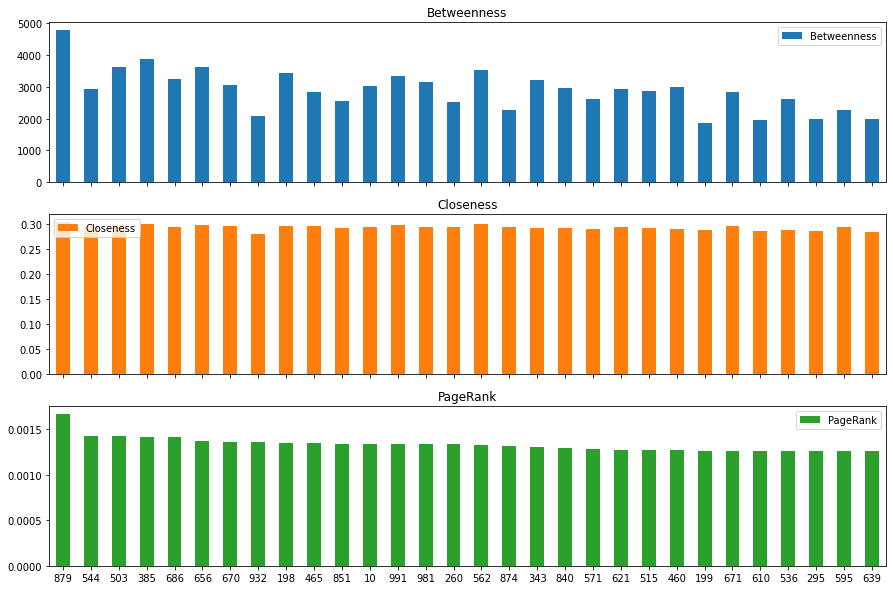

In [ ]:
# Plotting the 1st group of interest
axes = df1.plot.bar(rot=0, subplots=True, figsize=(15, 10))
axes[1].legend(loc=2)

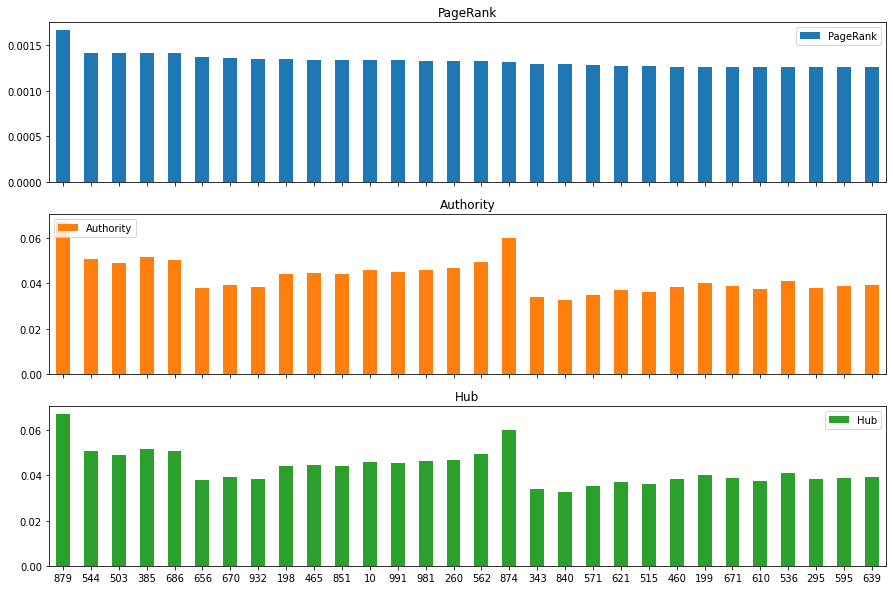

In [ ]:
# Plotting the 2nd group of interest
axes = df2.plot.bar(rot=0, subplots=True, figsize=(15, 10))
axes[1].legend(loc=2)